# Vasicek Model

The Vasicek model is a short rate model for interest rates. It describes the evolution of the instantaneous spot rate by a mean-reverting Ornstein-Uhlenbeck process with the following stochastic differential equation (SDE):

$$dr_t = \kappa (\theta - r_t)dt + \sigma dW_t$$
with initial condition $r_0$

where:
- $r_t$ is the instantaneous spot rate;
- $\kappa$ is the speed of mean reversion
- $\theta$ is the long term mean level of the instantaneous spot rate;
- $\sigma$ is the volatility of the instantaneous spot rate; and 
- $W_t$ is a Weiner process (Brownian motion). 

Solving the SDE for the vasicek model, we get the following solution:

$$r_t = r_s e^{-\kappa(t - s)} + \theta \big( 1 - e^{-\kappa(t - s)} \big) + \sigma \int_s^t e^{-\kappa(t - u)} dW_u$$

for each $s < t$.

$r_t$ conditional on $F_s$ is normally distributed with mean and variance given by:

$$\mathbf{E} [r_t|F_s] = r_s e^{-\kappa(t - s)} + \theta \big( 1 - e^{-\kappa(t - s)} \big)$$

$$\mathbf{Var}[r_t|F_s] = \frac{\sigma^2}{2\kappa}\big[1 - e^{-2\kappa(t - s)} \big]$$

as $t \rightarrow \infty$, the limit of expected rate and variance, will converge to $\theta$ and $\frac{\sigma^2}{2\kappa}$ respectively.

Since $r_t$ conditional on $F_s$ is normally distributed, the rate $r_t$ can take on negative values with positive probability. In the past, negative interest rates were seen to be impossible and this was considered to be a major drawback of the vasicek model for interest rates. 

One advantage of the vasicek model is the analytical tractability implied by the normal distribution, which is not easily achieved when other distributions are assumed.

# Simulation

Two approaches are considered for the simulation of sample paths from the vasicek model
1. Using an Euler dsicretisation of the vasicek SDE.
2. Using the analytical moments to the solution of the vasicek SDE.

Below we outline both approaches and simulate sample paths using the approaches.

In [16]:
from vasicek import *
import matplotlib.pyplot as plt

### 1. Euler Discretisation
We can discretise the vasicek SDE as follows:

$$r_{t + \Delta_t} = r_t + \kappa(\theta - r_t)\Delta_t + \sigma \sqrt{\Delta_t}N_{0, 1}$$

where:
- $\Delta_t$ is a small time increment.
- $N_{0, 1}$ is a random draw from a standard normal distribution.

Hence given the value of the spot rate today and the parameters of the vasicek model, we can simulate random draws from a standard normal distribution and apply the above equation to get samples of the spot rate at the next time interval. We can continue to do this until we get the desired length of our sample path.

In [17]:
kappa = 3
theta = 1
sigma = 0.5

In [18]:
vasicek_model = Vasicek(kappa = kappa, theta = theta, sigma = sigma)

In [19]:
vasicek_euler_paths = vasicek_model.euler_simulation(rt = 0.07, n_years = 5, n_timesteps = 60, n_scenarios = 250)
vasicek_euler_paths

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,...,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000
1,0.448453,0.667453,0.347112,0.042986,0.428036,0.363324,0.323672,0.216779,0.155260,0.493293,...,0.275426,0.452290,0.281768,0.343203,0.475821,0.391652,0.150726,0.416946,0.258922,0.360907
2,0.534436,0.666129,0.386730,0.573533,0.668555,0.313677,0.441923,0.304727,0.518565,0.509171,...,0.136038,0.521474,0.373039,0.702807,0.379948,0.811872,0.308823,0.487383,0.454478,0.654301
3,0.540775,0.847677,0.680583,0.722929,0.685509,0.361163,0.537998,0.258529,0.485880,0.725227,...,0.147247,0.524689,0.469183,0.906860,0.516741,0.692243,0.499695,0.721827,0.618902,0.637578
4,0.580825,0.697698,0.670402,0.579261,0.801708,0.622385,0.658761,0.235077,0.609696,0.764627,...,0.487170,0.730968,0.611272,0.637343,0.867018,0.820536,0.987230,0.744939,0.685718,0.790369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.036170,1.166686,1.129374,1.526756,0.844917,1.119189,1.030830,0.689776,1.231519,0.505414,...,0.986760,0.997530,0.945971,1.082478,0.968271,1.056410,0.843680,1.382556,0.786415,1.184716
57,1.000512,1.125489,1.402735,1.467592,0.889009,1.016209,0.751379,0.604757,1.278945,0.614550,...,0.931611,0.758814,1.032969,1.069579,1.004123,0.940901,0.746812,1.233733,0.838576,1.319863
58,1.335754,0.961148,1.300007,1.442851,0.812421,1.134695,0.634864,0.919386,1.245752,0.558411,...,0.829080,0.490319,1.033363,1.026258,0.774355,1.041260,0.892703,1.057228,1.044176,1.350523
59,1.454092,0.957865,1.239963,1.241830,0.902489,1.166190,0.662531,0.990169,1.398973,0.673506,...,0.627067,0.819068,0.946091,1.214742,0.967550,1.038159,0.910593,1.004234,0.927008,1.701275


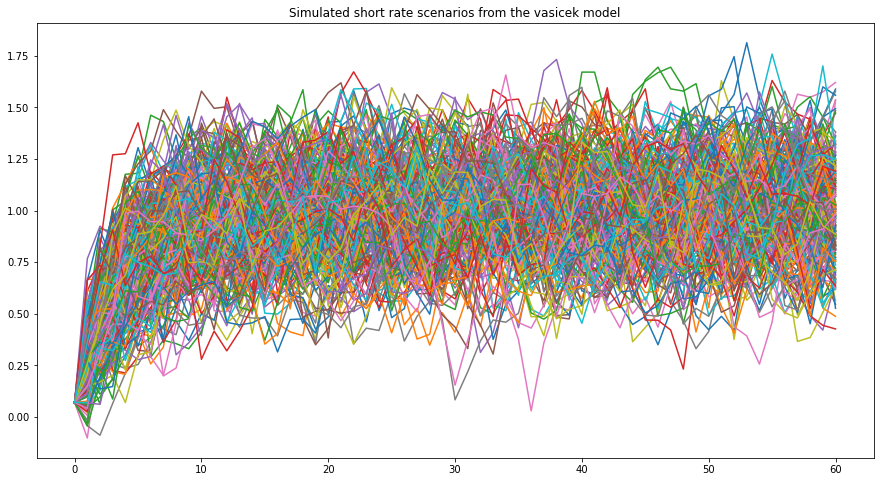

In [20]:
vasicek_euler_paths.plot(figsize = (15, 8), legend = False)
plt.title('Simulated short rate scenarios from the vasicek model')
plt.show()

### 2. Using Analytical Moments
We know that:

$$[r_{t + \Delta_t}|F_t]  \sim N\Big(r_t e^{-\kappa \Delta_t} + \theta \big( 1 - e^{-\kappa \Delta_t} \big), \frac{\sigma^2}{2\kappa}\big[1 - e^{-2\kappa \Delta_t} \big]\Big)$$

for $t \geq 0$ and $\Delta_t > 0$.

Hence given the value of the spot rate today and the parameters of the vasicek model, we can simulate future relisations of the spot rate directly from a normal distribution with the parameters above. This gives us the following linear equation for $r_{t + \Delta_t}$:

$$r_{t + \Delta_t} = r_t e^{-\kappa \Delta_t} + \theta \big( 1 - e^{-\kappa \Delta_t}\big) + \sigma \sqrt{\frac{1 - e^{-2\kappa \Delta_t}}{2\kappa}}N_{0, 1}$$

In [21]:
vasicek_moments_paths = vasicek_model.moments_simulation(rt = 0.07, n_years = 5, n_timesteps = 60, n_scenarios = 250)
vasicek_moments_paths

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,...,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000,0.070000
1,0.150832,-0.003194,0.412047,0.488257,0.124231,0.492535,0.527933,0.170494,0.309292,0.313870,...,0.195466,0.265151,0.448272,0.280829,0.192587,0.220192,0.316158,0.394042,0.478758,0.195025
2,0.454586,0.249998,0.641116,0.525121,0.247663,0.522711,0.608892,0.444802,0.426522,0.478106,...,0.559250,0.286896,0.566300,0.536327,0.631725,0.237946,0.532744,0.592601,0.424305,0.364719
3,0.533905,0.381796,0.779265,0.473919,0.283029,0.730555,0.563228,0.693712,0.575566,0.781845,...,0.661387,0.362846,0.722593,0.437041,0.574671,0.531062,0.935215,0.719043,0.586758,0.424664
4,0.602677,0.670929,0.951514,0.519116,0.583688,0.923049,0.756584,0.773359,0.599918,0.800988,...,0.624821,0.516228,0.857000,0.594235,0.662839,0.618648,0.727120,0.702012,0.507979,0.485170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.896422,1.351024,0.764644,0.841836,1.041447,1.040278,1.150225,0.890297,1.221546,1.199753,...,1.075126,0.757569,0.980559,0.928142,1.234116,0.922905,0.607324,1.178972,1.390720,1.148786
57,0.819010,1.433853,0.926971,0.786179,1.218910,1.151540,1.248335,0.774629,1.172131,0.932151,...,0.938546,0.629299,1.162734,0.750583,1.047973,1.109556,0.768494,1.048731,1.196879,1.080940
58,0.981261,1.207578,1.279711,0.991569,1.210278,1.086120,1.039275,0.956566,1.184383,0.915678,...,0.912804,0.685314,1.253787,0.807975,1.076239,1.007906,0.749524,1.085322,1.317401,0.969218
59,0.881316,1.239586,1.172066,1.045174,0.984587,1.126061,1.098419,1.030676,1.329885,0.950961,...,0.905670,0.990176,1.221655,0.891235,0.936647,1.059276,0.996110,1.102459,1.148663,0.993401


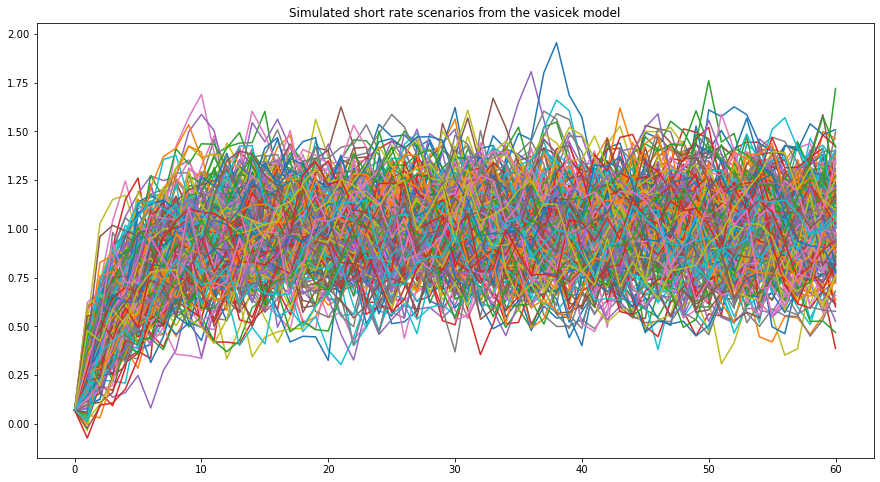

In [22]:
vasicek_moments_paths.plot(figsize = (15, 8), legend = False)
plt.title('Simulated short rate scenarios from the vasicek model')
plt.show()

# Calibration

We consider two methods for calibrating the paramaters of the vasicek model to a time series of data:

1. Least Squares Regression
2. Maximum Likelihood Estimation

## 1. Least Squares Regression

The method of least squares in a regression analysis is to approximate the solution of an overdetermined system of equations by minimizing the sum of the squares of the residuals (the difference between an observed value, and the fitted value provided by a model) made in the results of each individual equation. That is, we maximize the fit of the model to the data by choosing the model parameters that on average give results closet to the data.

Recall the analytical moments simulation of the vasicek model: 

$$r_{t + \Delta_t} = r_t e^{-\kappa \Delta_t} + \theta \big( 1 - e^{-\kappa \Delta_t}\big) + \sigma \sqrt{\frac{1 - e^{-2\kappa \Delta_t}}{2\kappa}}N_{0, 1}$$

This tells us that the relationship between $r_{t + \Delta_t}$ and $r_t$ is linear with an i.i.d normal random term $\epsilon$. That is:

$$r_{t + \Delta_t} = a r_t + b + \epsilon$$

where:
- $b = \theta \big( 1 - e^{-\kappa \Delta_t}\big)$
- $a = e^{-\kappa \Delta_t}$
- $\epsilon = \sigma \sqrt{\frac{1 - e^{-2\kappa \Delta_t}}{2\kappa}}N_{0, 1}$ and $\sigma_{\epsilon} = \sigma \sqrt{\frac{1 - e^{-2\kappa \Delta_t}}{2\kappa}}$

The relationship between the linear fit and the model parameters is given by:

$$\kappa = -\frac{\ln(a)}{\Delta_t}$$

$$\theta = \frac{b}{1 - a}$$

$$\sigma = \sigma_{\epsilon}\sqrt{\frac{-2\ln(a)}{\Delta_t(1 - a^2)}}$$

Hence, we can fit a regression line to a time series of data and get estimates for the following parameters:

$$\hat{a} = \frac{n \sum_{i = 1}^n r_i r_{i - 1} - \sum_{i = 1}^n r_i \sum_{i = 1}^n r_{i - 1}}{n \sum_{i = 1}^n r_{i - 1}^2 - (\sum_{i = 1}^n r_{i - 1})^2}$$

$$\hat{b} = \frac{1}{n} \Big(\sum_{i = 1}^n r_i - \sum_{i = 1}^n \hat{a} r_{i - 1} \Big)$$

$$\hat{\sigma_{\epsilon}}^2 = \frac{1}{n}\sum_{i = 1}^n\Big[r_i - \hat{a}r_{i - 1} - \hat{b}(1 - \hat{a})\Big]^2$$

then we can estimate the model parameters as:

$$\hat{\kappa} = -\frac{\ln(\hat{a})}{\Delta_t}$$

$$\hat{\theta} = \frac{\hat{b}}{1 - \hat{a}}$$

$$\hat{\sigma} = \hat{\sigma_{\epsilon}}\sqrt{\frac{-2\ln(\hat{a})}{\Delta_t(1 - {\hat{a}}^2)}}$$

In [23]:
print("Vasicek model parameters before calibration")
print("𝜅 : %5.3f"% (vasicek_model.kappa))
print("𝜃 : %5.3f"% (vasicek_model.theta))
print("𝜎 : %5.3f"% (vasicek_model.sigma))

Vasicek model parameters before calibration
𝜅 : 3.000
𝜃 : 1.000
𝜎 : 0.500


In [24]:
analytical_path = vasicek_moments_paths[0]
dt = 5/60

In [25]:
vasicek_model.regression_calibration(analytical_path, dt)

In [26]:
print("Vasicek model parameters after calibration")
print("𝜅 : %5.3f"% (vasicek_model.kappa))
print("𝜃 : %5.3f"% (vasicek_model.theta))
print("𝜎 : %5.3f"% (vasicek_model.sigma))

Vasicek model parameters after calibration
𝜅 : 4.436
𝜃 : 0.980
𝜎 : 0.537


## 2. Maximum Likelihood Estimation

In maximum likelihood estimation we search over all possible sets of parameter values for an assumed probability distribution to find the set of values for which the observed sample was most likely from. This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate.

The probability density function of a normal distribution function with mean $\mu$ and standard deviation $\sigma$ is as follows:

$$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

hence the conditional density function of an observation $r_{t + \Delta_t}$ given a previous observation $r_t$ is given by:

$$f(r_{t + \Delta_t}|r_t, \kappa, \theta, \bar{\sigma}) = \frac{1}{\sqrt{2\pi \bar{\sigma}^2}} e^{-\frac{\big[r_{t + \Delta_t} - \big(r_t e^{-\kappa \Delta_t} + \theta ( 1 - e^{-\kappa \Delta_t}) \big) \big]^2}{2 \bar{\sigma}^2}}$$

with 
$\bar{\sigma}^2 = \sigma^2 \frac{1 - e^{-2 \kappa \Delta_t}}{2 \kappa}$.

The log-likelihood function of a set of observation ($r_0, r_1, \dots, r_n$) can be derived from the conditional density function:

$$\mathcal{L} (\kappa, \theta, \bar{\sigma}) = \sum_{i = 1}^n \ln f(r_{t + \Delta_t}|r_t, \kappa, \theta, \bar{\sigma})= -\frac{n}{2}\ln(2\pi) - n\ln(\bar{\sigma}) - \frac{1}{2 \bar{\sigma}^2} \sum_{i = 1}^n \big[r_i - \big(r_{i - 1} e^{-\kappa \Delta_t} + \theta ( 1 - e^{-\kappa \Delta_t}) \big) \big]^2$$

The maximum of this log-likelihood surface can be found at the location where all the partial derivatives are zero. This leads to the following constraints:

1. partial derivative w.r.t $\kappa$

$$\frac{\partial \mathcal{L} (\kappa, \theta, \bar{\sigma})}{\partial \kappa} = 0 = -\frac{\Delta_te^{-\kappa \Delta_t}}{\bar{\sigma}^2} \sum_{i = 1}^n \big[(r_i - \theta)(r_{i - 1} - \theta) -  e^{-\kappa \Delta_t}(r_{i - 1} - \theta)^2 \big]$$

$$\kappa = -\frac{1}{\Delta_t}\ln\frac{\sum_{i = 1}^n (r_i - \theta)(r_{i - 1} - \theta)}{\sum_{i = 1}^n (r_{i - 1} - \theta)^2}$$

2. partial derivative w.r.t $\theta$

$$\frac{\partial \mathcal{L} (\kappa, \theta, \bar{\sigma})}{\partial \theta} = 0 = \frac{1}{\bar{\sigma}^2} \sum_{i = 1}^n \big[r_i - \big(r_{i - 1} e^{-\kappa \Delta_t} + \theta ( 1 - e^{-\kappa \Delta_t}) \big) \big]$$

$$\theta = \frac{\sum_{i = 1}^n (r_i - r_{i - 1}e^{-\kappa \Delta_t})}{n ( 1 - e^{-\kappa \Delta_t})}$$

3. partial derivative w.r.t $\bar{\sigma}$

$$\frac{\partial \mathcal{L} (\kappa, \theta, \bar{\sigma})}{\partial \bar{\sigma}} = 0 = \frac{n}{\bar{\sigma}} - \frac{1}{\bar{\sigma}^3}\sum_{i = 1}^n\big[r_i - \theta - e^{-\kappa \Delta_t}(r_{i - 1} - \theta) \big]^2$$

$$\bar{\sigma}^2 = \frac{1}{n} \sum_{i = 1}^n\big[r_i - \theta - e^{-\kappa \Delta_t}(r_{i - 1} - \theta) \big]^2$$

The problem with these equations is that the solutions depend on each other. However, both $\kappa$ and $\theta$ are independent of $\bar{\sigma}$. Hence knowing either $\kappa$ or $\theta$ will directly give the value the other. The solution for $\bar{\sigma}$ can be found once both $\kappa$ and $\theta$ are determined. 

Therefore, to solve these equations it is thus sufficient to find either $\kappa$ or $\theta$.

In [27]:
vasicek_model = Vasicek(kappa = kappa, theta = theta, sigma = sigma)

In [28]:
print("Vasicek model parameters before calibration")
print("𝜅 : %5.3f"% (vasicek_model.kappa))
print("𝜃 : %5.3f"% (vasicek_model.theta))
print("𝜎 : %5.3f"% (vasicek_model.sigma))

Vasicek model parameters before calibration
𝜅 : 3.000
𝜃 : 1.000
𝜎 : 0.500


In [29]:
vasicek_model.mle_calibration(analytical_path, dt)

In [30]:
print("Vasicek model parameters after calibration")
print("𝜅 : %5.3f"% (vasicek_model.kappa))
print("𝜃 : %5.3f"% (vasicek_model.theta))
print("𝜎 : %5.3f"% (vasicek_model.sigma))

Vasicek model parameters after calibration
𝜅 : 3.158
𝜃 : 0.995
𝜎 : 0.399


# Financial Instrument Pricing

In the vasicek model, we can derive analytical formulas for zero-coupon bonds (a bond in which the face value is repaid at the time of maturity and does not pay coupons during the life of the bond) and options on zero coupon bonds.


### 1. Zero-Coupon Bond

In the Vasicek model, the price of a zero-coupon bond with maturity $T$ at time $t \in [0, T]$ is given by:

$$ P(t, T) = A(t, T)e^{-r_t B(t, T)} $$

where:

- $A(t, T) = \exp\Big\{\Big(\theta - \frac{\sigma^2}{2\kappa^2} \Big)[B(t, T) - T + t] -  \frac{\sigma^2}{4\kappa}B(t, T)^2\Big\}$
- $B(t, T) = \frac{1}{\kappa}\big[1 - e^{-\kappa(T - t)}\big]$


### 2. European Options on Zero-Coupon Bonds

The analytical formula for the price of a european option at time t with strike $K$, maturity $T$ written on a zero-coupon bond with maturity $S$ in the vasicek model is given by:

$$\text{Bond Option} (t,  = \phi \big[P(t, S) \Phi(\phi * d_1) - K P(t, T) \Phi(\phi * d_2)  \big]$$

where:
- $d_1 = \frac{\ln \big(\frac{P(t, S)}{P(t, T) K} \big)+ \frac{\sigma_p^2}{2}}{\sigma_p}$
- $d_2 = d_1 - \sigma_p$
- $\sigma_p = \sigma \sqrt{\frac{1 - e^{-2 \kappa (T - t)}}{2 \kappa}} B(T, S)$

In [11]:
rt = 0.07
t = 0
T = 1
S = 2
K = 0.8

In [12]:
vasicek_model.analytical_bondprice(rt, t, T)

0.9075088365648791

In [13]:
vasicek_model.analytical_optionprice(rt, t, T, S, K)

0.04274721766088485

In [14]:
0.1215

0.1215